Training binary classifier for digit 4...
Iteration 10/30 completed
Iteration 20/30 completed
Iteration 30/30 completed
Accuracy: 0.9816


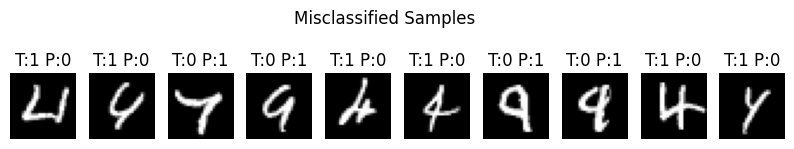

In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt

# ==========Load IDX Files ==========
def load_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images[:(len(images)//(rows * cols)) * rows * cols]
        return images.reshape(-1, rows * cols).astype(np.float32) / 255.0

def load_labels(filename):
    with open(filename, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels[:num]

# ========== 1. Sigmoid Function ==========
def sigmoid(z):
    # Implement sigmoid function: 1 / (1 + e^(-z))
    # Adding clipping to prevent overflow
    z = np.clip(z, -500, 500)  # Prevent numerical overflow
    return 1.0 / (1.0 + np.exp(-z))

# ========== 2. SGD: Algorithm 7.1 ==========
def sgd_logistic(X, y, eta, max_iters):
    # Initialize weights to zeros
    n_features = X.shape[1]
    w = np.zeros(n_features)
    
    # Number of samples
    n_samples = X.shape[0]
    
    # Stochastic Gradient Descent implementation (Algorithm 7.1)
    for iteration in range(max_iters):
        # Shuffle data
        shuffle_idx = np.random.permutation(n_samples)
        X_shuffled = X[shuffle_idx]
        y_shuffled = y[shuffle_idx]
        
        # Process one sample at a time
        for i in range(n_samples):
            x_i = X_shuffled[i]
            y_i = y_shuffled[i]
            
            # Calculate prediction using current weights
            z_i = np.dot(w, x_i)
            y_pred = sigmoid(z_i)
            
            # Calculate error
            error = y_i - y_pred
            
            # Update weights using gradient of log-likelihood
            gradient = error * x_i
            w = w + eta * gradient
        
        # Optional: Print progress every 10 iterations
        if (iteration + 1) % 10 == 0:
            print(f"Iteration {iteration + 1}/{max_iters} completed")
    
    return w

# ==========Show Misclassified Samples ==========
def show_misclassified(X, true_labels, pred_labels, max_show=10):
    mis_idx = np.where(true_labels != pred_labels)[0][:max_show]
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(mis_idx):
        plt.subplot(1, len(mis_idx), i + 1)
        plt.imshow(X[idx, 1:].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f"T:{true_labels[idx]} P:{pred_labels[idx]}")
    plt.suptitle("Misclassified Samples")
    plt.show()

# ========== 3. Main ==========
if __name__ == "__main__":
    # === Load Data ===
    X_train = load_images("train-images.idx3-ubyte____")
    y_train = load_labels("train-labels.idx1-ubyte____")
    X_test = load_images("t10k-images.idx3-ubyte____")
    y_test = load_labels("t10k-labels.idx1-ubyte____")

    # === Choose binary classification target digit ===
    # Set TARGET_DIGIT to the last digit of your student ID
    TARGET_DIGIT = 4  # TODO: Change this to the last digit of your student ID
    y_train_bin = np.where(y_train == TARGET_DIGIT, 1, 0)
    y_test_bin = np.where(y_test == TARGET_DIGIT, 1, 0)

    # === Add bias term ===
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    # === Set parameters ===
    eta = 0.01  # Learning rate
    max_iters = 30  # Number of SGD iterations

    # === Train ===
    print(f"Training binary classifier for digit {TARGET_DIGIT}...")
    w = sgd_logistic(X_train, y_train_bin, eta, max_iters)

    # === Predict ===
    pred_probs = sigmoid(np.dot(X_test, w))
    preds = (pred_probs >= 0.5).astype(int)

    # === Evaluate ===
    accuracy = np.mean(preds == y_test_bin)
    print(f"Accuracy: {accuracy:.4f}")

    # === Show Misclassified Samples ===
    show_misclassified(X_test, y_test_bin, preds)